# Week 4: Clustering

1. Reference

  * Text:
  "An Introduction to Statistical Learning with Applications in R" (ISLR) [링크 텍스트](https://www.statlearning.com/)

  * Dataset: Netflix_movies_and_tv_shows_clustering
https://www.kaggle.com/code/bansodesandeep/netflix-movies-and-tv-shows-clustering/input

  * Copied https://www.kaggle.com/code/bansodesandeep/netflix-movies-and-tv-shows-clustering/notebook

2. Introduction

* Unsupervised Learning and Clustering

 1) Unsupervised vs. Supervised Learning

  * In terms of supervised learning methods, we observe oboth a set of features X1, X2, ..., Xp for each object, as well as a response our outcome variable Y. The goal is to predict Y using X1, X2, ..., Xp.

  * Here, we instead focus on unsupervised learning, we where observe only the features X1, X2, ..., Xp. We are not interested in prediction as we do not have an associated response variable Y.

  2) The Goals of Unsupervised Learning

  * To discover interesting things about the measurements: is there an informative way to visualize the data? Can we discover subgroups among the variables or among the observations?

  * We discuss two methods:
    * **principal components analysis**, a tool used for data visualization or data pre-processing before supervised techniques are applied → will be discussed in **7. Dimension Reduction**.

    * **clustering**, a broad class of methods for discovering unknown subgroups in data.

  3) What is Clustering?

  * Clustering refers to a very broad set of techniques for finding subgroups, or clusters, in a data set.

  * We seek a partition of the data into distinct groups so that the observations within each group are quite similar to each other.

  * To make this concrete, we must define what it means for two or more observations to be *similar* or *different*.

  * Indeed, this is often a domain-specific consideration that must be made based on knowledge of the data being studied.

  4) Clustering Methods Discussed Here

  * K-means Clustering
  * Hierarchical Clustering
  * DBSCAN



## Defining Problem & Understanding Dataset

### **1. Problem statement:**

*   Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.
*   We will be able to understand the shows that are similar to and different from the another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.
*   The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

### **2. Importing the libraries and the dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Netflix_movies_and_tv_shows_clustering.csv to Netflix_movies_and_tv_shows_clustering.csv


In [3]:
original_df = pd.read_csv('/content/Netflix_movies_and_tv_shows_clustering.csv', index_col='show_id')
df = original_df.copy()

### **3. Understanding data:**

In [4]:
df.head()

type  title           director  \
show_id                                      
s1       TV Show     3%                NaN   
s2         Movie   7:19  Jorge Michel Grau   
s3         Movie  23:59       Gilbert Chan   
s4         Movie      9        Shane Acker   
s5         Movie     21     Robert Luketic   

                                                      cast        country  \
show_id                                                                     
s1       João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
s2       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
s3       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
s4       Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
s5       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

                date_added  release_year rating   duration  \
show_id                                                      
s1         August 14, 2020          2020  TV-MA  4 Seasons   
s2       December 23, 2016          2016  TV-MA     93 min   
s3       December 20, 2018          2011      R     78 min   
s4       November 16, 2017          2009  PG-13     80 min   
s5         January 1, 2020          2008  PG-13    123 min   

                                                 listed_in  \
show_id                                                      
s1       International TV Shows, TV Dramas, TV Sci-Fi &...   
s2                            Dramas, International Movies   
s3                     Horror Movies, International Movies   
s4       Action & Adventure, Independent Movies, Sci-Fi...   
s5                                                  Dramas   

                                               description  
show_id                                                     
s1       In a future where the elite inhabit an island ...  
s2       After a devastating earthquake hits Mexico Cit...  
s3       When an army recruit is found dead, his fellow...  
s4       In a postapocalyptic world, rag-doll robots hi...  
s5       A brilliant group of students become card-coun...

In [5]:
df.shape

(7787, 11)

In [6]:
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

#### **3.1. Attribute Information**

*   **show_id**: Unique ID for every movie / TV show
*   **type**: Identifier - A Movie of TV Show
*   **title**: Title of the movie / TV show
*   **director**: Director of the movie
*   **cast**: Actors involved in the movie / show
*   **country**: Country where the movie / show was produced
*   **date_added**: Date it was added on Netflix
*   **released_year**: Actual release year o f the movie / show
*   **rating**: TV Rating of the moview / show
*   **duration**: Total duration - in minutes or number of seasons
*   **listed_in**: Genre
*   **description**: The summary description

### **4. Cleaning data:**

#### **4.1. Checking for duplicate records:**

In [7]:
df.duplicated().value_counts()

False    7787
Name: count, dtype: int64

There are no duplicated recoreds in the dataset.

#### **4.2. Checking for missing values and handling them:**

<Axes: ylabel='show_id'>

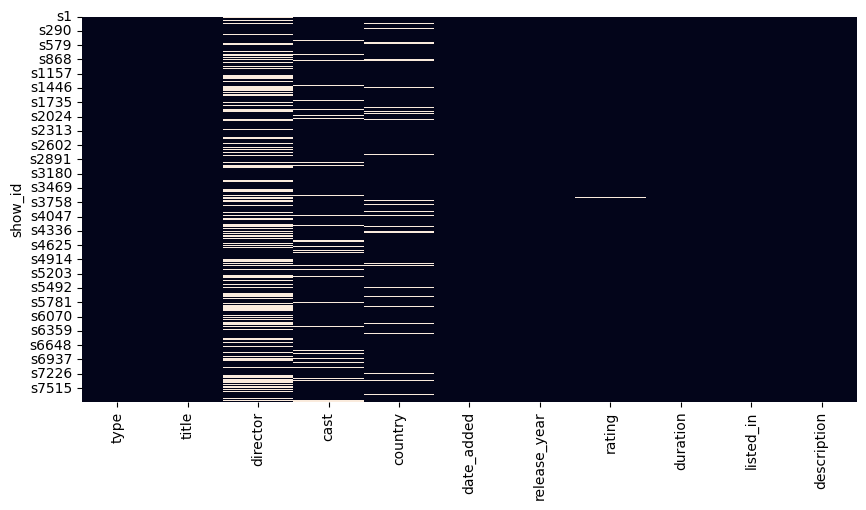

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False)

In [9]:
# Missing values in the dataset
df.isna().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are many missing values in director, cast, country, date_added, and rating columns.

In [10]:
# Checking the unique values in each attribute of the dataset
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

*   The missing values in the director, cast, and country attributes can be replaced with 'Unknown.'
*   10 records with missing values in the date_added column cab be dropped.
*   The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [11]:
# Handling the missing values
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace=True)

In [12]:
df.shape

(7777, 11)

We have successfully handled all the missing values in the dataset.

#### **4.3. Country, listed_in:**

In [13]:
df.country.value_counts()

country
United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

In [14]:
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: int64

*   There are some movies / TV shows that were filmed in multiple countries or have multiple genres associated with it.
*   To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
*   Also, let's consider only the primary genre of the respective movie / TV show.

In [15]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [16]:
# country in which a movie was produced
df.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 82, dtype: int64

In [17]:
# genre of shows
df.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
TV Shows                          12
Cult Movies                       12
Sci-Fi & Fantasy                  11
TV Horror                         10
Romantic Movies                    3
Spanish-Language TV Shows          2
Sports Movies                      1
TV Sci-Fi & Fantasy                1
LGBTQ Movies                       1
Name: count, dtype: int64

#### **4.4. Typecasting 'duration' from string to integer:**

In [18]:
# Spliiting the duration column and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [19]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

duration
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: count, dtype: int64

In [20]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [21]:
# Checking datatype of duration
df.duration.dtype

dtype('int64')

#### **4.5. Typecasting 'date_added' from string to datetime:**

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

In [23]:
# first and last date on which a show was added on Netflix
df.date_added.min(), df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix betweeen January 1st, 2008, and January 16th, 2021.

In [24]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

#### **4.6. Rating:**

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

<Axes: xlabel='rating', ylabel='count'>

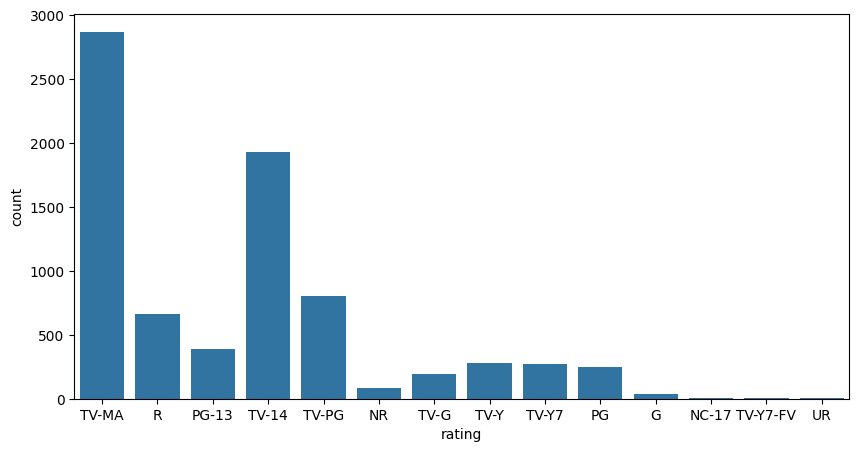

In [25]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df)

Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG.

In [26]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [27]:
# Changing the values in the rating column
rating_map = {'TV-MA': 'Adults',
              'R': 'Adults',
              'PG-13': 'Teens',
              'TV-14': 'Young Adults',
              'TV-PG': 'Older Kids',
              'NR': 'Adults',
              'TV-G': 'Kids',
              'TV-Y': 'Kids',
              'TV-Y7': 'Older KIds',
              'PG': 'Older KIds',
              'G': 'Kids',
              'NC-17': 'Aults',
              'TV-Y7-FV': 'Older Kids',
              'UR': 'Adults'}

df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids',
       'Older KIds', 'Aults'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

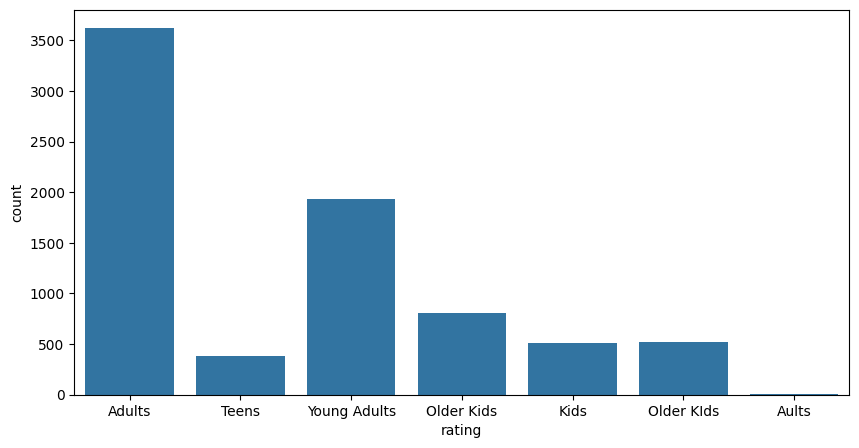

In [28]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df)

Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

### **5. Exploratory Data Analysis:**

#### **5.1. Univariate Analysis:**

Text(0, 0.5, '')

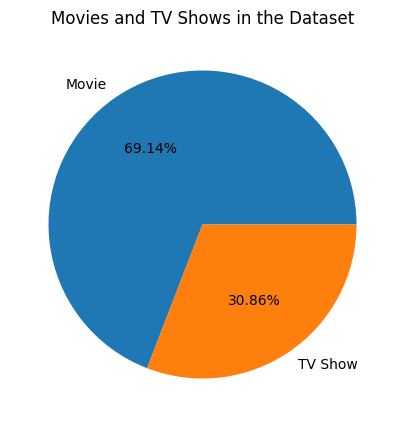

In [29]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(10, 5))
df.type.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Movies and TV Shows in the Dataset')
plt.ylabel('')

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

Text(0.5, 1.0, 'Top 10 Directors by Number of Shows Directed')

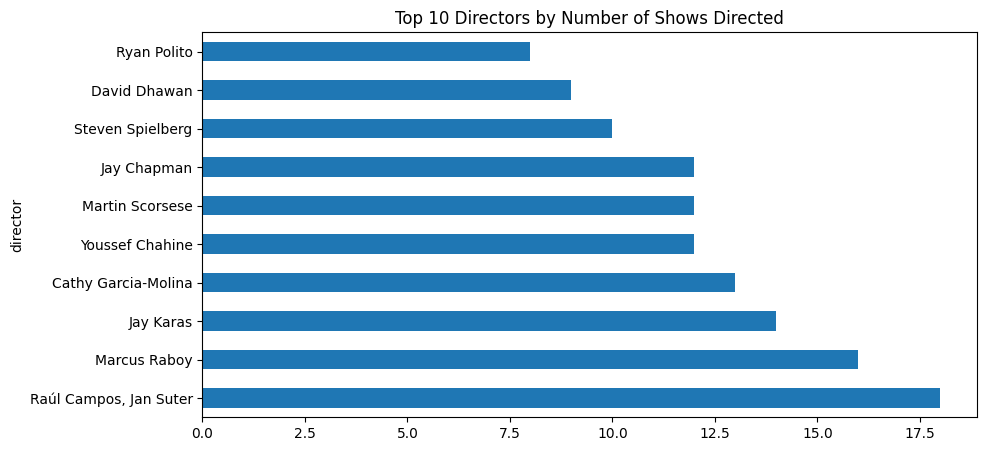

In [30]:
# Top 10 directors in the dataset
plt.figure(figsize=(10, 5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Directors by Number of Shows Directed')

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, 'Top 10 Countries with the Highest Number of Shows')

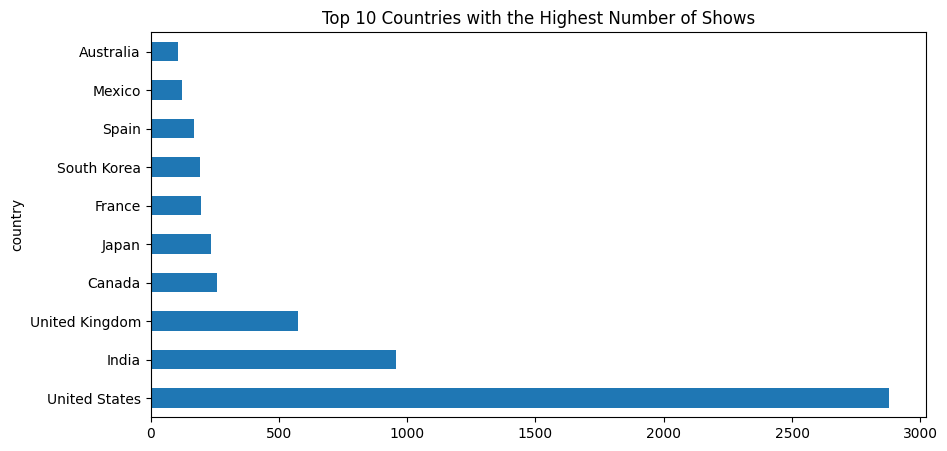

In [31]:
# Top 10 countries with the highest number of movies / TV shows in the dataset
plt.figure(figsize=(10, 5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Countries with the Highest Number of Shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [32]:
# % share of movies / TV shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [33]:
# % share of movies / TV shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

*   The top 3 countries together account for about 56% of all movies and TV shows in the dataset.
*   This value increases to about 78% for top 10 countries.

Text(0.5, 1.0, 'Distribution of Release Year')

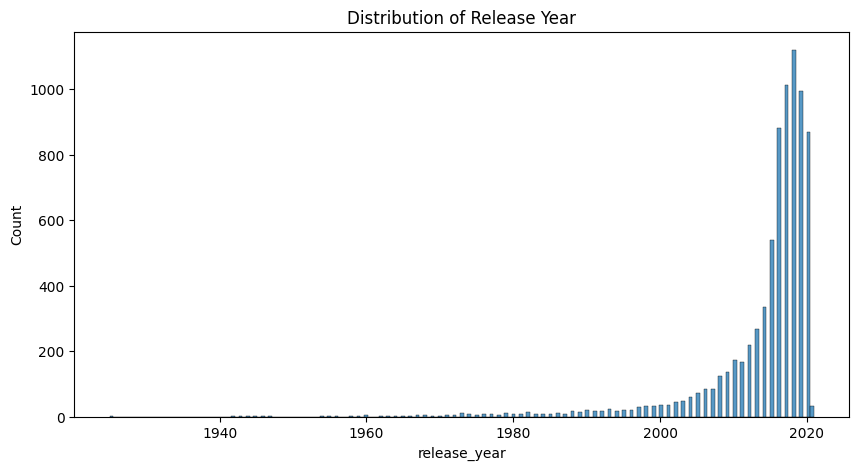

In [34]:
# Visualizing the year in which the movie / TV show was released
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'])
plt.title('Distribution of Release Year')

Netflix has greater number of new movies / TV shows than the old ones.

Text(0.5, 1.0, 'Top 10 Genres')

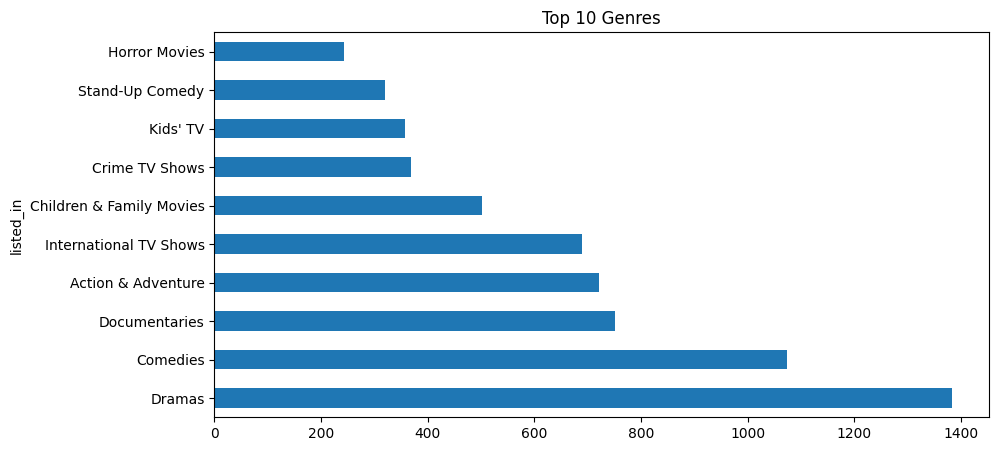

In [35]:
# Top 10 genres
plt.figure(figsize=(10, 5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Genres')

In [36]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [37]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

*   The dramas is the most popular genre followed by comedies and documentaries.
*   These three genres account for about 41% of all movies and TV shows.
*   This value increases to about 82% for top 10 genres.

Text(0.5, 0, '')

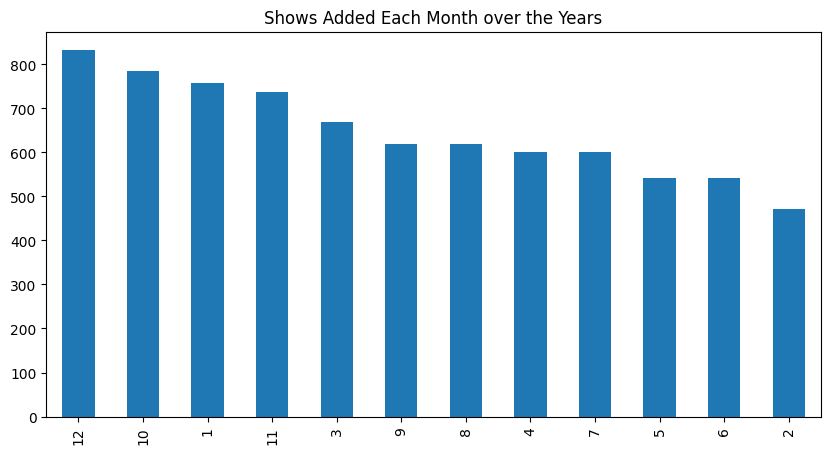

In [38]:
# Number of shows added in different months
plt.figure(figsize=(10, 5))
df.month_added.value_counts().plot(kind='bar')
plt.title('Shows Added Each Month over the Years')
plt.xlabel('')

Over the years a greater number of shows were added in the months of December, October, January, and November.

Text(0.5, 0, '')

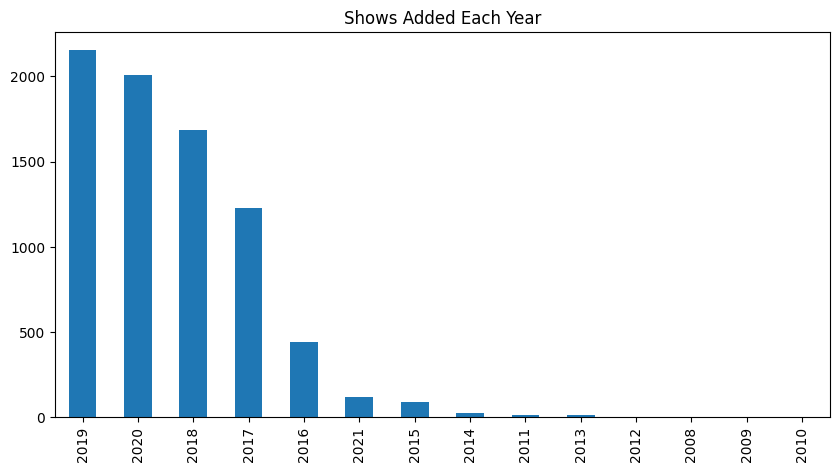

In [39]:
# Number of shows added over the years
plt.figure(figsize=(10, 5))
df.year_added.value_counts().plot(kind='bar')
plt.title('Shows Added Each Year')
plt.xlabel('')

*   Netflix cotinuously added more shows on its platform over the years.
*   There is a decrease in the number of shows added in the year of 2020, which might be attributed to the COVID-19-induced lockdowns, which halted the creation to shows.
*   We have Netflix data only up to 16th January, 2021, hence there are lesss movies added in this year.


Text(0.5, 1.0, 'Shows on Netflix for Different Age Groups')

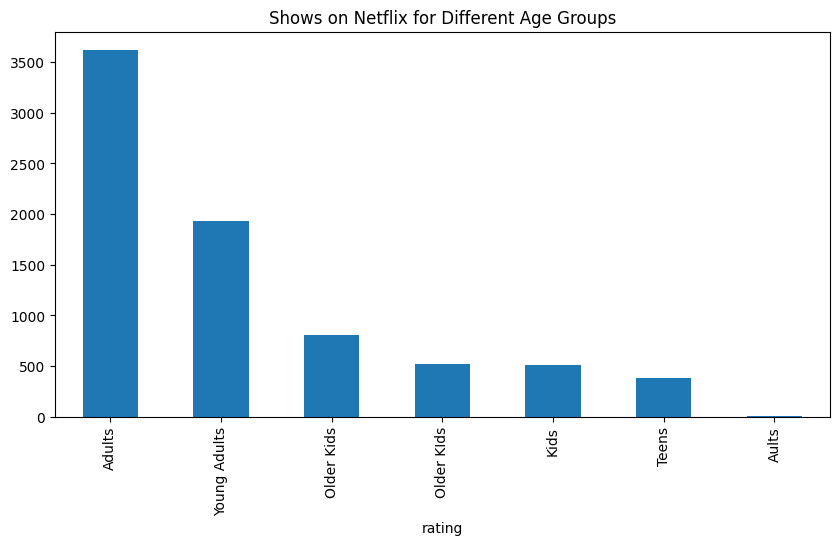

In [40]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10, 5))
df.rating.value_counts().plot(kind='bar')
plt.title('Shows on Netflix for Different Age Groups')

The majority of the shows on Netflix are catered to the needs of adult and young adult population.

#### **5.2. Bivariate Analysis:**

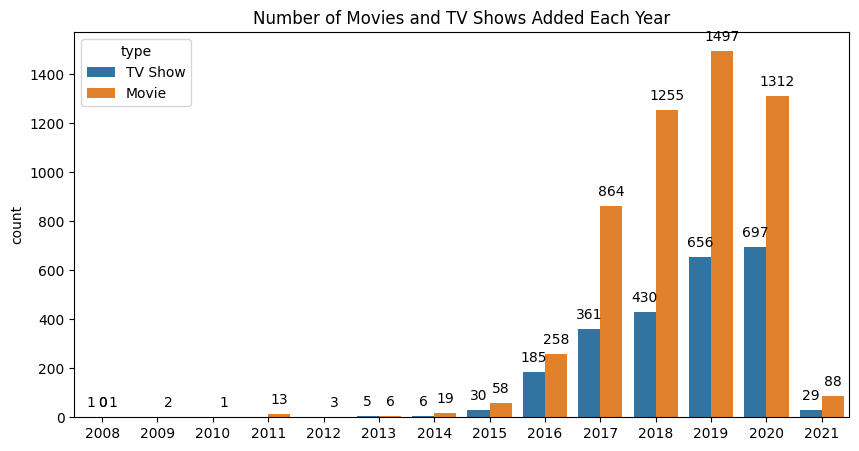

In [41]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10, 5))
p = sns.countplot(x='year_added', data=df, hue='type')
plt.title('Number of Movies and TV Shows Added Each Year')
plt.xlabel('')
for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

*   Over the years, Netflix has consistently focused on adding more shows in its platform.
*   Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
*   This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

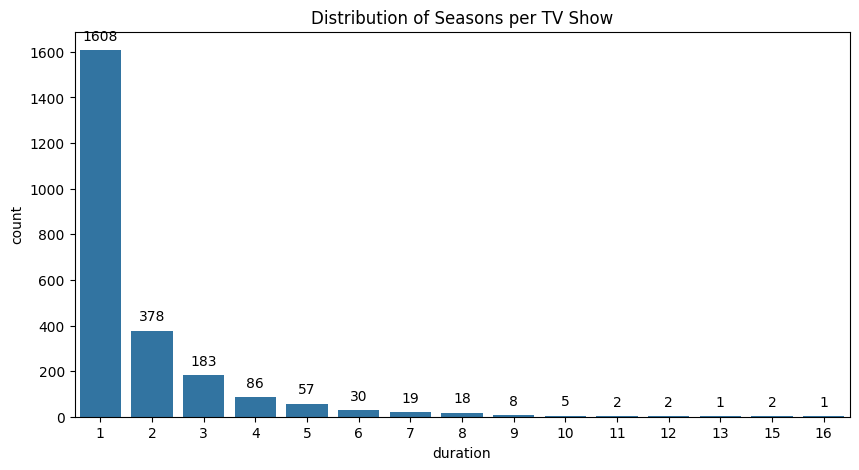

In [42]:
# Seasons in each TV show
plt.figure(figsize=(10, 5))
p = sns.countplot(x='duration', data=df[df['type']=='TV Show'])
plt.title('Distribution of Seasons per TV Show')

for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [43]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

*   The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that they majority of TV shows has only recently begun, and that further seasons are on the way.
*   There are very few TV shows that have more than 8 seasons.

Text(0.5, 1.0, 'Distribution of Movie Length')

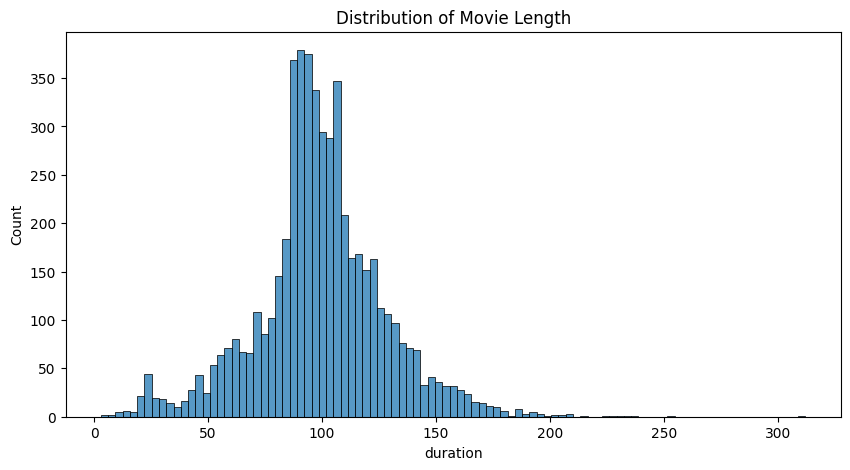

In [44]:
# length of movie analysis
plt.figure(figsize=(10, 5))
sns.histplot(x='duration', data=df[df['type']=='Movie'])
plt.title('Distribution of Movie Length')

The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

Text(0, 0.5, 'Length of Movie in Minutes')

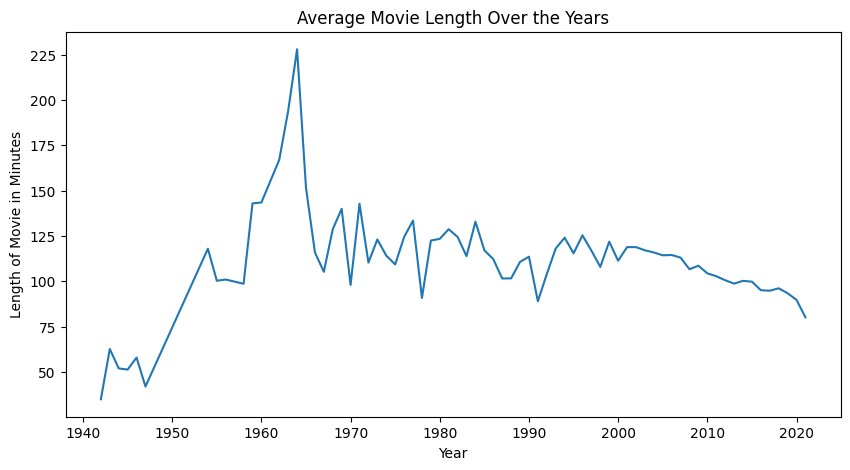

In [45]:
# Average movie length over the years
plt.figure(figsize=(10, 5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average Movie Length Over the Years')
plt.xlabel('Year')
plt.ylabel('Length of Movie in Minutes')

In [46]:
# Movie release year statistics
df[df['type']=='Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

*   Netflix has several movies on its site, including those that were released in way back 1942.
*   As per the plot, movies made in the 1950s had a fairly short duration on average.
*   On average, movies made in the 1960s have the longest movie length.
*   The average length of a movie has been continuously decreasing since the 2000s.

Text(0.5, 1.0, 'Top 10 Genres for Movies')

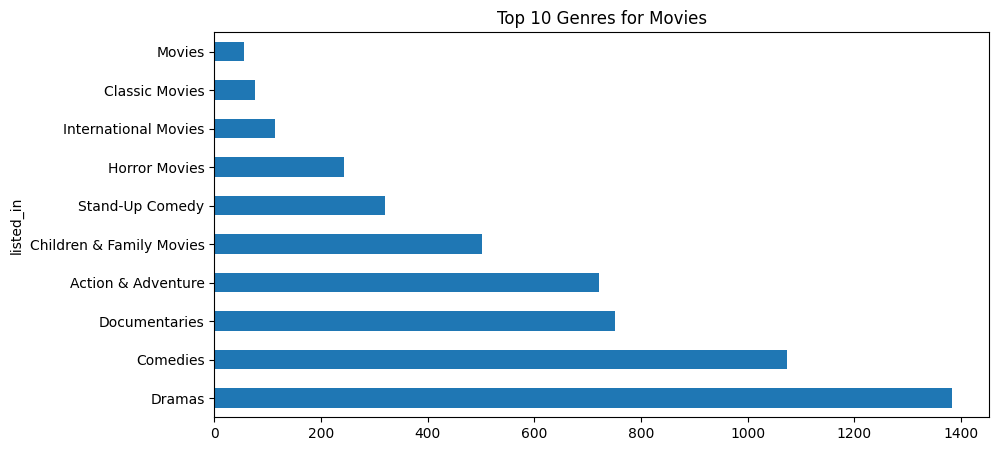

In [47]:
# Top 10 genre for movies
plt.figure(figsize=(10, 5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Genres for Movies')

Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

Text(0.5, 1.0, 'Top 10 Genres for TV Shows')

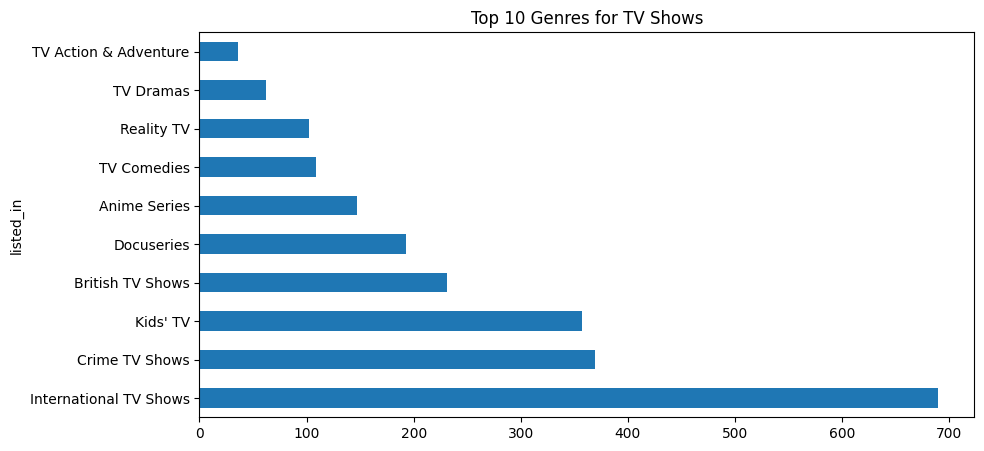

In [48]:
# Top 10 genre for TV shows
plt.figure(figsize=(10, 5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Genres for TV Shows')

International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 Movie Directors')

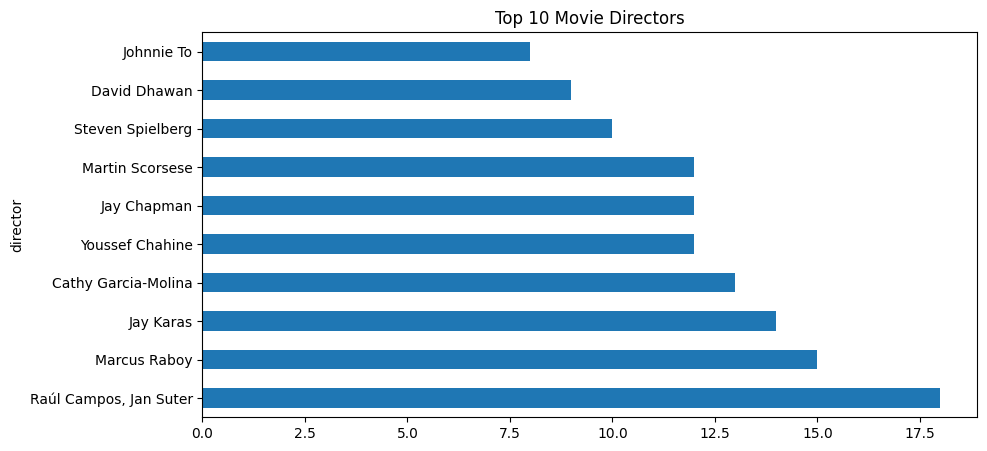

In [49]:
# Top 10 movie directors
plt.figure(figsize=(10, 5))
df[~(df['director']=='Unknown')&(df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Movie Directors')

*   Raul Campos and Jan Suter have together directed in 18 movies, higher than anyone yet.
*   This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina.

Text(0.5, 1.0, 'Top 10 TV Show Directors')

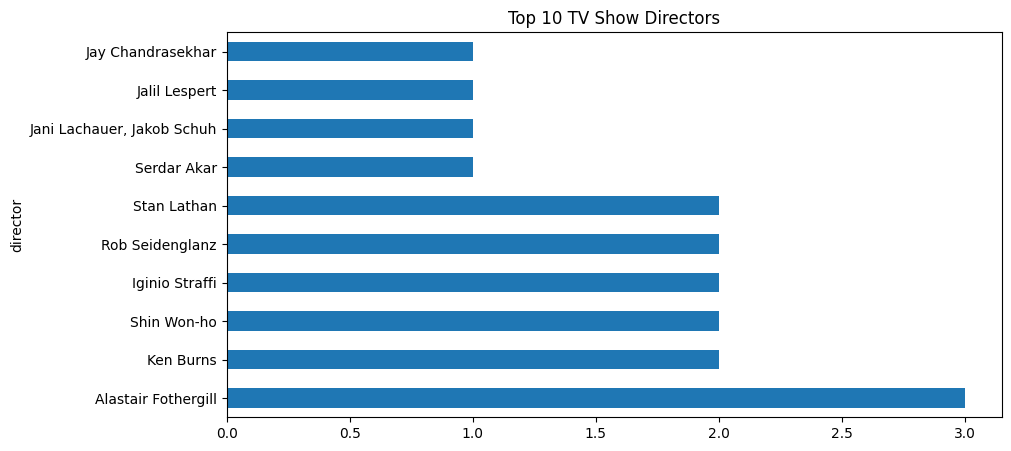

In [50]:
# TOp 10 TV show directors
plt.figure(figsize=(10, 5))
df[~(df['director']=='Unknown')&(df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV Show Directors')

*   Alastair Fothergill has directed three TV shows, the most of any director.
*   Only six directors have directed more than one television show.

Text(0.5, 1.0, 'Actors Who Have Appeared in Highest Number of Movies')

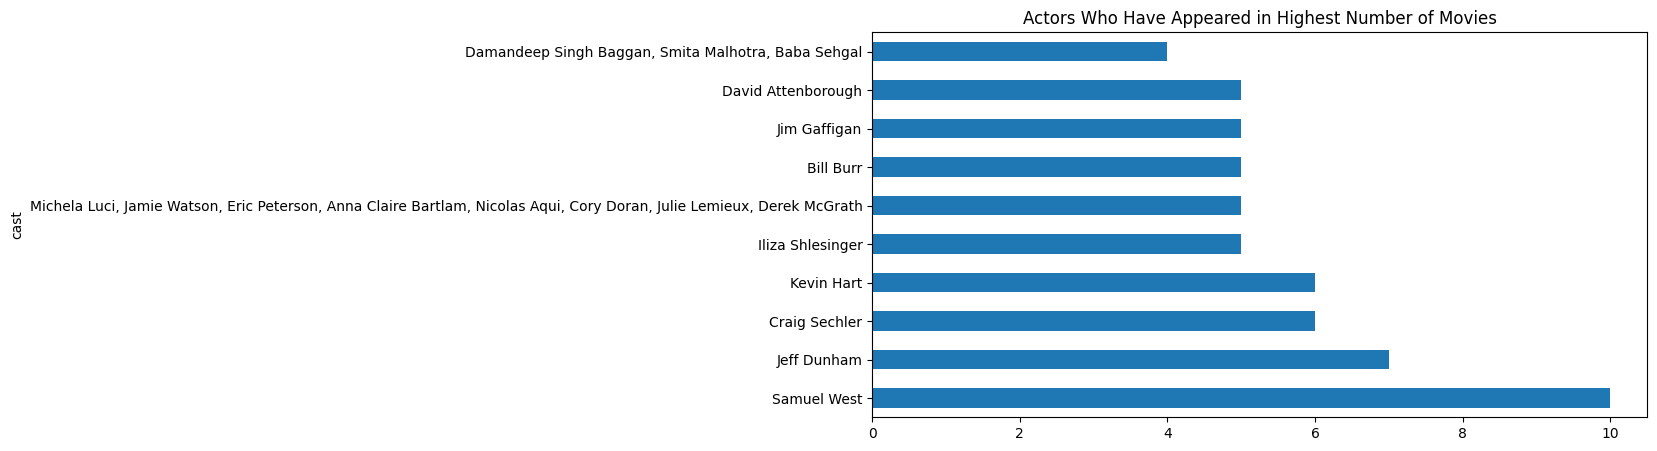

In [51]:
# Top actors for movies
plt.figure(figsize=(10, 5))
df[~(df['cast']=='Unknown')&(df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors Who Have Appeared in Highest Number of Movies')

Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

Text(0.5, 1.0, 'Actors Who Have Appeared in Highest Number of TV Shows')

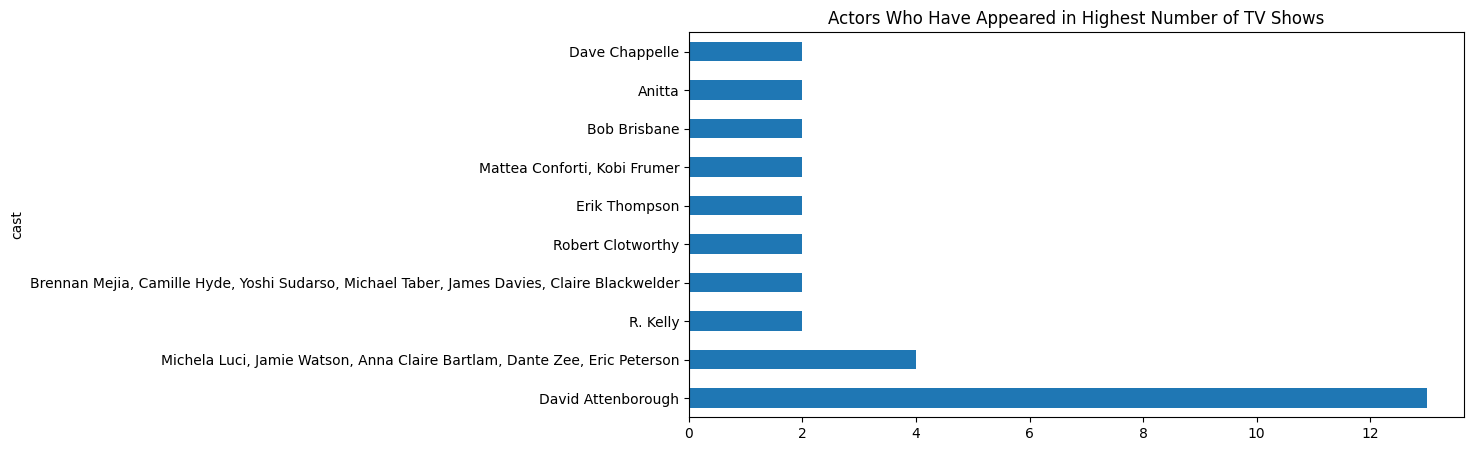

In [52]:
# Top actors TV shows
plt.figure(figsize=(10, 5))
df[~(df['cast']=='Unknown')&(df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors Who Have Appeared in Highest Number of TV Shows')

David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

In [53]:
from wordcloud import WordCloud, STOPWORDS

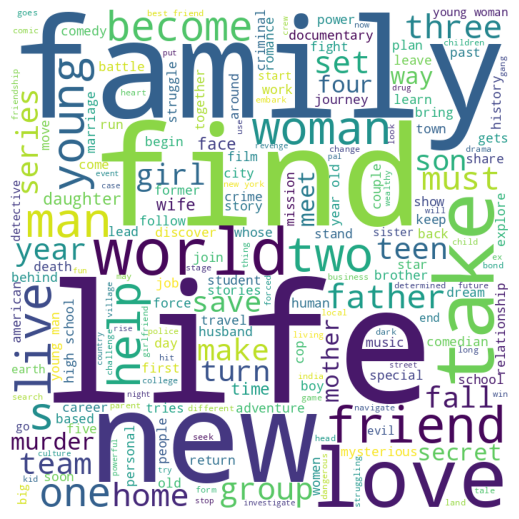

In [54]:
# Building a wordcloud for the movie description
comment_words=''
stopwords=set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    val=str(val)

    tokens=val.split()

    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=700, height=700,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

### **6. Data Preprocessing**

#### **6.1. Modelling Approach:**

1. Select the attributes based on which you want to cluster the shows.
2. Text preprocessing: Remove all non-ascii characters, stopwords, and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
7. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques.
8. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

Here, we will cluster the shows on Netflix based on the following attributes:

*   Director
*   Cast
*   Country
*   Listed in (genres)
*   Description

In [55]:
# Using the original dataset for clustering since it does not require handling missing values
df1 = original_df.copy()

In [56]:
df1.fillna('', inplace=True)

In [57]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director']+' '+
                                df1['cast']+' '+
                                df1['country']+' '+
                                df1['listed_in']+' '+
                                df1['description'])

In [58]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

Successfully added all the necessary data into a single column.

### **6.2. Removing non-ASCII characters:**

In [59]:
import re, string, unicodedata

In [60]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [61]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [62]:
df1['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

Successfully removed all non-ascii characters from the corpus.

#### **6.3. Remove stopwords and lower case:**

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [64]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [65]:
# Building a function to remove stopwords
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [66]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [67]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

Successfully removed all the stopwords and converted the corpus to lowercase.M

#### **6.4. Removing Punctuations:**

In [68]:
# Building a function to remove puncuations
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [69]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuations)

In [70]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

Successfully dropped all the punctuation marks from the corpus.

#### **6.5.Lemmatization:**

In [71]:
# Building a function to lemmatize the corpus
from nltk.stem import WordNetLemmatizer

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [72]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [73]:
# Lemmatization
df1['clustering_attribtues'] = lemmatize_verbs(df1['clustering_attributes'])

In [74]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

Successfully lemmatized the corpus.

#### **6.6. Tokenization:**

In [75]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

In [76]:
df1['clustering_attributes'] = df1['clustering_attributes'].astype(str)
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

#### **6.7. Vectorization:**

We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.


* *TF* = *Number of times term t appears in a document* / *Total number of terms in the document*
* *IDF(t)* = *log_e(Total number of documents / Number of documents with term t in it)*
* *TFIDF = TF * IDF*

In [77]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [78]:
# Tokenization
def identity_tokenizer(text):
    return text

from sklearn.feature_extraction.text import TfidfVectorizer

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [79]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 235288 stored elements in Compressed Sparse Row format>

In [80]:
X.shape

(7787, 20000)

In [81]:
type(X)

scipy.sparse._csr.csr_matrix

In [82]:
X = X.toarray()

#### **6.8. Dimensionality reduction using PCA:**

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'Cumulative Explained Variance')

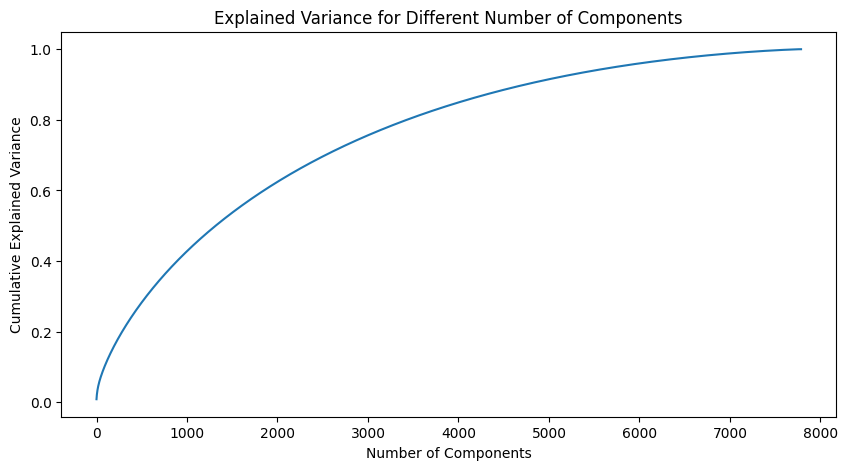

In [85]:
# Explained variance for different number of components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

*   We find that 100% of the variance is explained by about ~7500 components.
*   Also, more than 80% of the variance is explained just by 4000 components.
*   Hence, to simplify the model and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [86]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000, random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [87]:
# transformed features
x_pca = pca.transform(X)

In [88]:
x_pca.shape

(7787, 4000)

### **7. Clusters Implementation:**

#### **7.1. K-Means Clustering:**

Here, we will visulaize the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'WCSS')

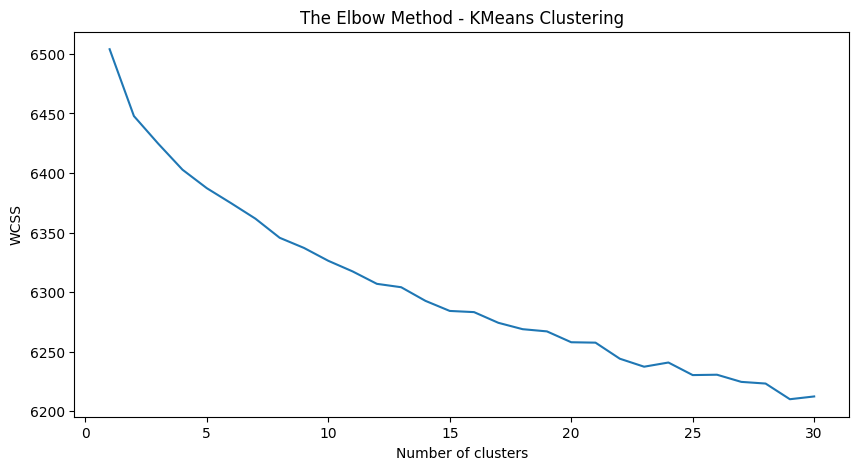

In [90]:
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(x_pca)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 31)
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The sum of squared distance between each point and the centroid in a cluster (WCSS, Within-Cluster Sum of Squares) decreases with the increase in the number of clusters.

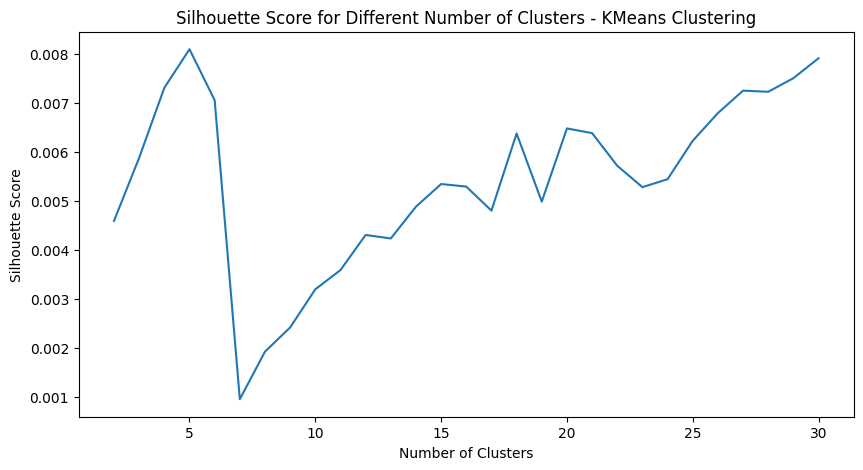

In [91]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2, 31)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)
    kmeans.fit(x_pca)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.title('Silhouette Score for Different Number of Clusters - KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The highest Silhouette score is obtained for 6 clusters. Therefore, we will build 6 clusters using the k-means clustering algorithm:

In [93]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [94]:
# 성능 평가 - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6374.66158668537, 0.007052362738310501)


In [95]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

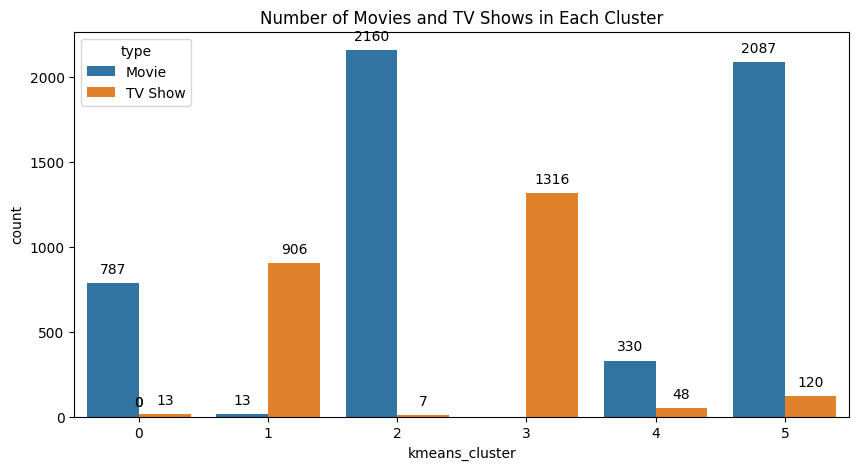

In [98]:
# Number of movies and TV shows in each cluster
plt.figure(figsize=(10, 5))
q = sns.countplot(x='kmeans_cluster', data=df1, hue='type')
plt.title('Number of Movies and TV Shows in Each Cluster')
for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#### **7.1.1. Building Wordclouds for Different Clusters Built:**

In [107]:
# Building a wordcloud for the movie descriptions
def kmeans_wordcloud(cluster_num):
    comment_words=''
    stopwords = set(STOPWORDS)

    # iterate throught the csv file
    for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
        val = str(val)

        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width=700, height=700,
                          background_color='white',
                          stopwords = stopwords,
                          min_font_size=10).generate(comment_words)

    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

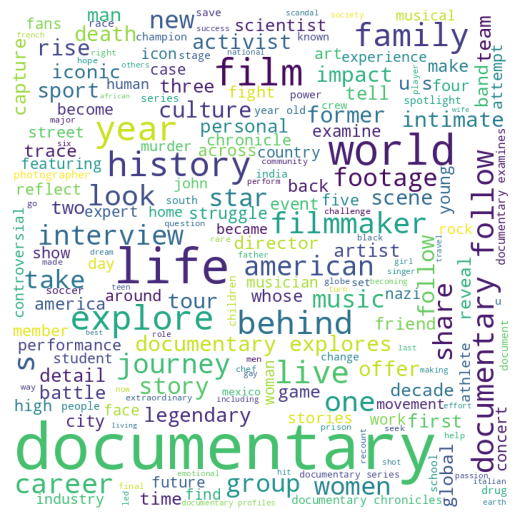

In [108]:
# Wordcloud of cluster 0
kmeans_wordcloud(0)

Keywords observed in cluster 0: life, new, family, friend, save, help, discover, home, teen

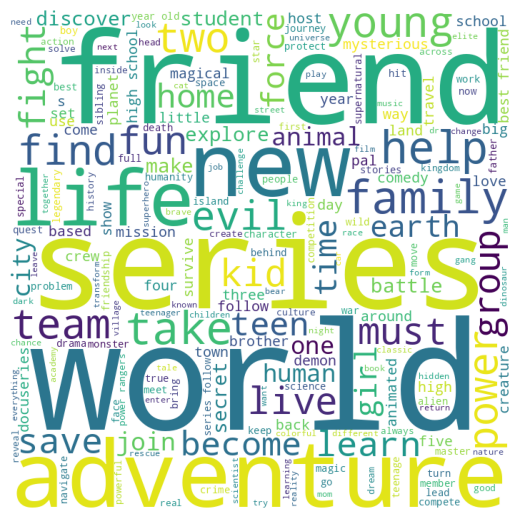

In [109]:
kmeans_wordcloud(1)

Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter

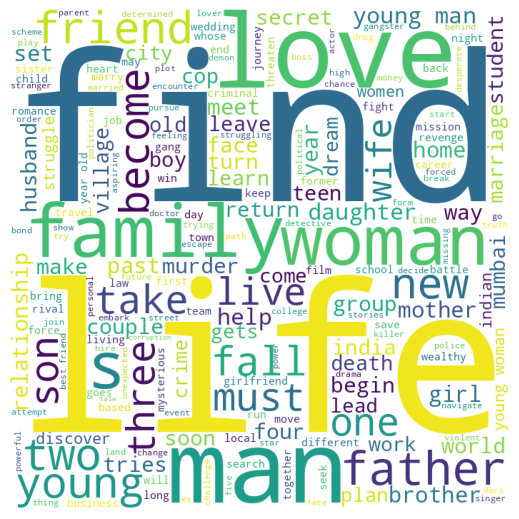

In [110]:
kmeans_wordcloud(2)

Keywords observed in cluster 2: young, world, girl, mysterious, humanity, life, student, school, battle, demon, force

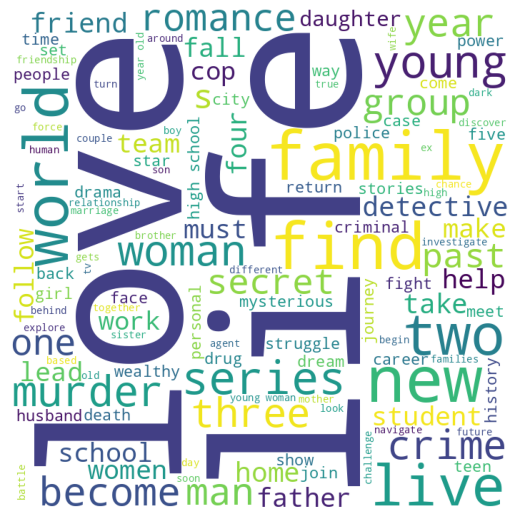

In [111]:
kmeans_wordcloud(3)

Keywords observed in cluster 3: love, life, family, romance, crime, murder, world, adventure

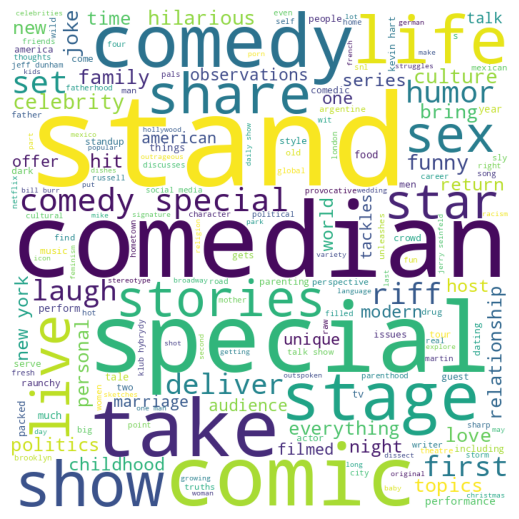

In [112]:
kmeans_wordcloud(4)

Keywords observed in cluster 4: comedian, special, stand, comic, stage, sex, joke

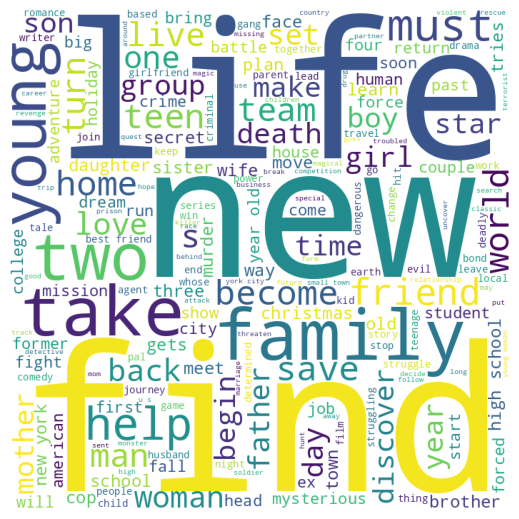

In [113]:
kmeans_wordcloud(5)

Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life

#### **7.2. Hierarchical Clustering:**

Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide the optimal number of clusters for the agglomerative clustering algorithm:

In [114]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

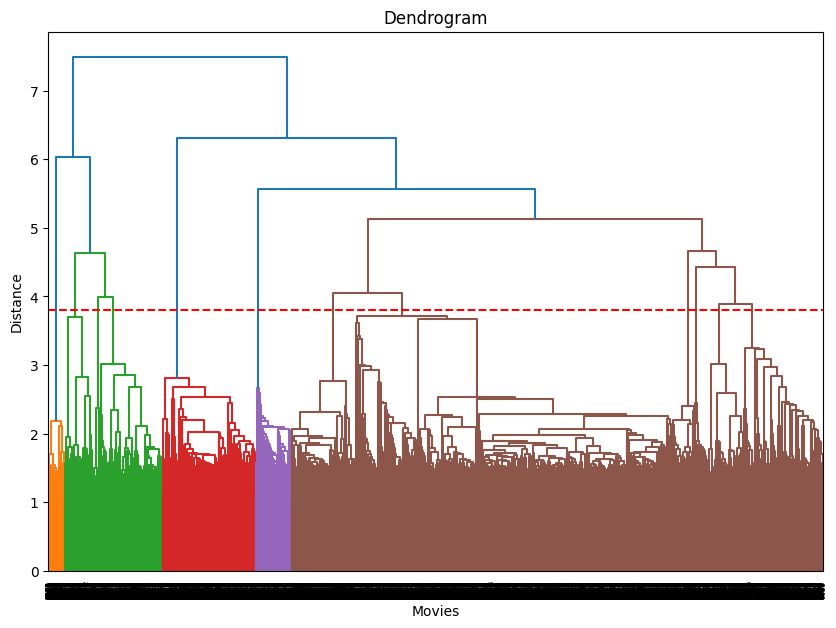

In [115]:
# Building a dendrogram to decide the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Movies')
plt.ylabel('Distance')
plt.axhline(y=3.8, color='r', linestyle='--')

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

Therefore, building 12 clusters using the Agglomerative Clustering algorithm would be like:

In [116]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([3, 5, 1, ..., 4, 2, 4])

In [117]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

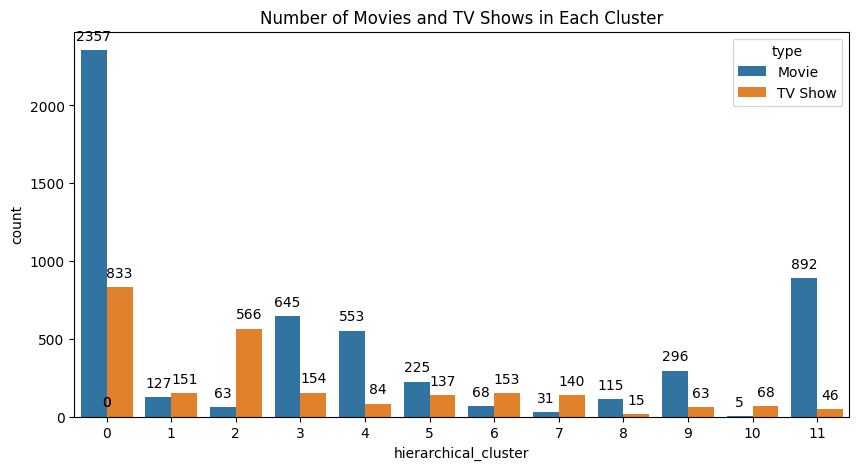

In [118]:
# Number of movies and TV shows in each cluster
plt.figure(figsize=(10, 5))
q = sns.countplot(x='hierarchical_cluster', data=df1, hue='type')
plt.title('Number of Movies and TV Shows in Each Cluster')
for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#### **7.2.1. Building Wordclouds for Different Clusters Built:**

In [119]:
# Building a wordcloud for the movie descriptions
def hierarchical_wordcloud(cluster_num):
    comment_words=''
    stopwords = set(STOPWORDS)

    # iterate throught the csv file
    for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:

        val = str(val)

        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width=700, height=700,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

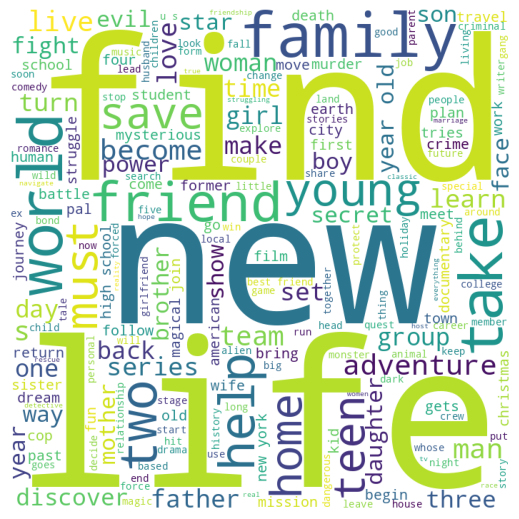

In [120]:
hierarchical_wordcloud(0)

Keywords observed in cluster 0: life, new, find, family, save, friend, young, teen, adventure

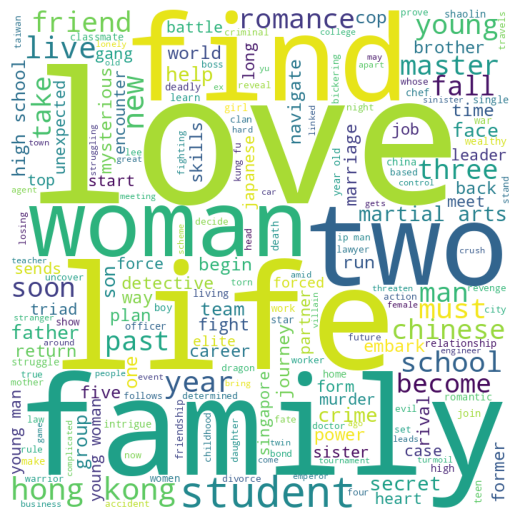

In [121]:
hierarchical_wordcloud(1)

Keywords observed in cluster 1: love, family, student, romance, school, woman, master, father

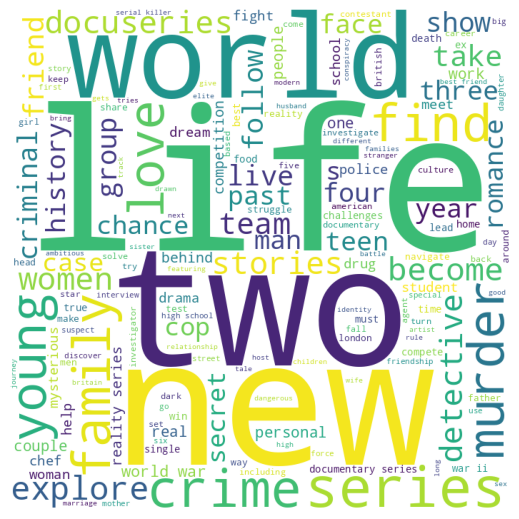

In [122]:
hierarchical_wordcloud(2)

Keywords observed in cluster 2: life, new, series, crime, world, murder, history, detective

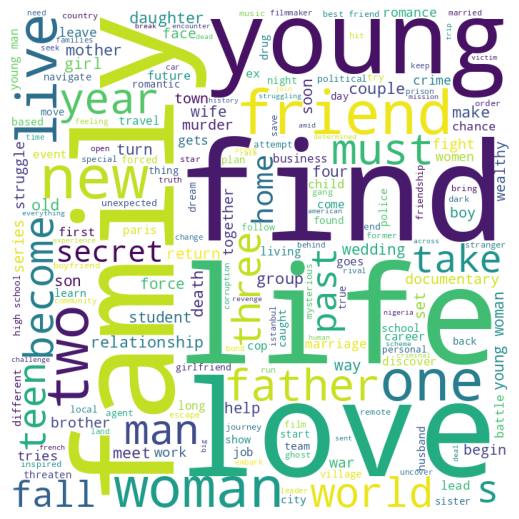

In [123]:
hierarchical_wordcloud(3)

Keywords observed in cluster 3: family, life, love, friend, teen, woman, man, young, world, wedding, secret

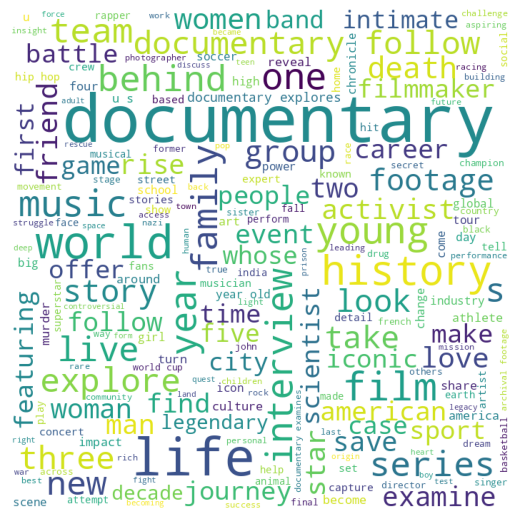

In [124]:
hierarchical_wordcloud(4)

Keywords observed in cluster 4: documentary, music, world, team, interview, history, family, career, battle, death

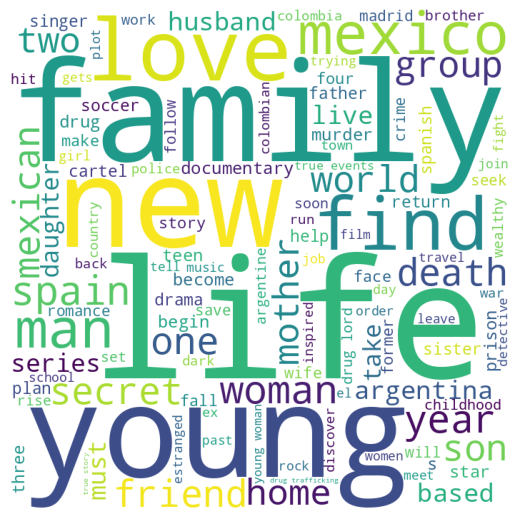

In [125]:
hierarchical_wordcloud(5)

Keywords observed in cluster 5: family, life, mexico, young, new, woman, man, secret, spain, death, singer

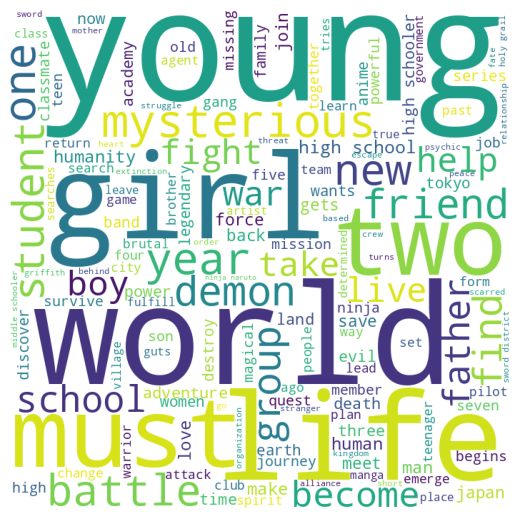

In [126]:
hierarchical_wordcloud(6)

Keywords observed in cluster 6: young, life, girl, world, friend, mysterious, demon, student, school, father

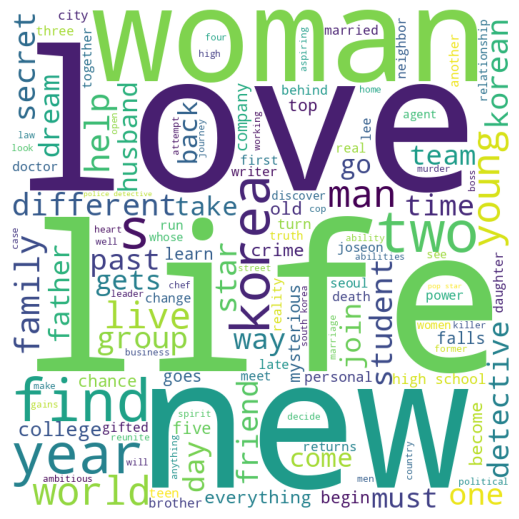

In [127]:
hierarchical_wordcloud(7)

Keywords observed in cluster 7: love, life, woman, new, student, family, korea, secret, detective, young

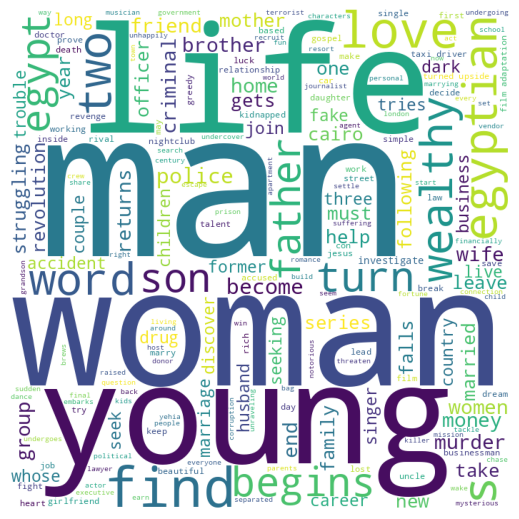

In [128]:
hierarchical_wordcloud(8)

Keywords observed in cluster 8: woman, man life, egypt, wealthy, money, young, love, revolution, struggling

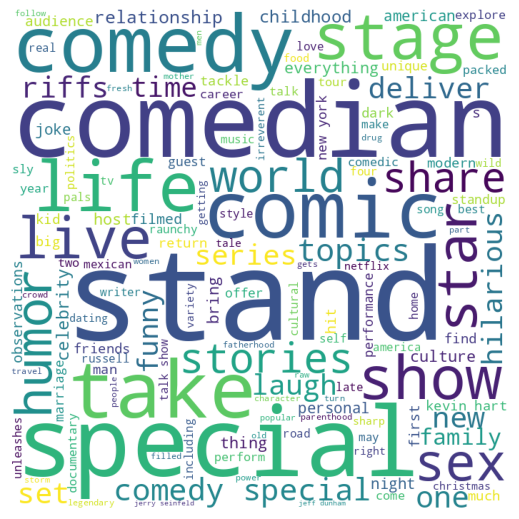

In [129]:
hierarchical_wordcloud(9)

Keywords observed in cluster 9: comedian, stand, life, comic, special, show, live, star, stage, hilarious, stories

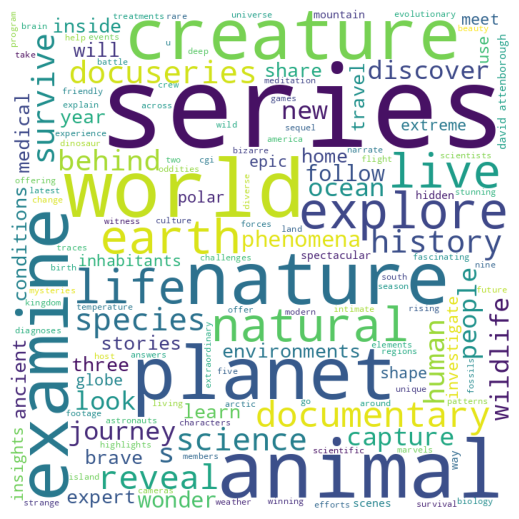

In [130]:
hierarchical_wordcloud(10)

Keywords observed in cluster 10: animal, nature, explore, planet, species, survive, natural, life, examine, earth

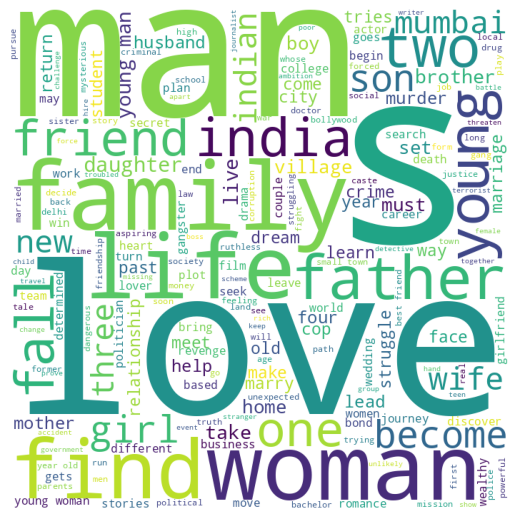

In [131]:
hierarchical_wordcloud(11)

Keywords observed in cluster 11: love, man, woman, india, father, friend, girl, mumbai, city, learn, young

### **8. Content-Based Recommender System:**

*   We can build a simple conent-based recommender system based on the similarity of the shows.
*   If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
*   To get the similarity score of the shows, we can use cosine similarity.
*   The similarity between two vectors (A and B) is calculated by taking the dot product of teh two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

    *Cos(θ) = A•B / |A|•|B|*

In [132]:
# Defining a new df for building a recommender system
recommender_df = df1.copy()

In [133]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [136]:
# Converting tokens to string
def convert(lst):
    return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [180]:
# Setting title of movies/TV shows as index
recommender_df.set_index('title', inplace=True)

In [181]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [182]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [183]:
cosine_similarity.shape

(7787, 7787)

In [185]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
    try:
      # 추천할 콘텐츠 리스트
      recommend_content = []
      # 입력된 제목과 동일한 인덱스 찾기
      idx = indices[indices==title].index[0]
      # 코사인 유사도 매트릭스에서 주어진 인덱스에 해당하는 유사도 점수를 시리즈로 변환하고 내림차순 정렬
      series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
      # 상위 10개의 인덱스를 리스트로 저장 (첫 번째 항목은 자기 자신이므로 제외)
      top10 = list(series.iloc[1:11].index)

      # list with the titles of the best 10 matching movies
      for i in top10:
          recommend_content.append(list(recommender_df.index)[i])
      print("If you liked '"+title+"', you may also enjoy:\n")
      return recommend_content

    except:
      return 'Invalid Entry'

In [186]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['Mr. Sunshine',
 'One Spring Night',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'My Little Baby',
 'Reply 1994',
 'Extracurricular',
 'My Secret Romance',
 'Chef & My Fridge']

In [187]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Scream',
 'Warrior Nun',
 'Nightflyers',
 'Zombie Dumb',
 'Kiss Me First',
 'The Vampire Diaries']

In [188]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'London Spy',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'My Hotter Half',
 'The Murder Detectives',
 'I AM A KILLER: RELEASED']

In [189]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Get Shorty',
 'The Good Cop',
 'Jack Taylor',
 'Better Call Saul',
 'Dramaworld',
 'Father Brown',
 "Marvel's Iron Fist",
 'Young Wallander',
 'No Good Nick']

In [190]:
# Recommendations for 'XXX'
recommend_10('XXX')

'Invalid Entry'

Invalid because the show named 'XXX' does not exist in the data.

### **9. Conclusions:**

*   In this project, we worked on a text clustering problem in which we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
*   The dataset contained about 7,787 records and 11 attributes.
*   We began by dealing with the dataset's missing values and doing EDA.
*   It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
*   It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
*   Through TFIDF Vectorization, we created a total of 20000 attributes.
*   We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
*   We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.
*   Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.
*   A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.